In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("C:\\Users\\karan\\Downloads\\Brain_Tumor_Prediction_Dataset.csv")

# Head

In [47]:
df.head().T

,0,1,2,3,4
Age,66,87,41,52,84
Gender,Other,Female,Male,Male,Female
Country,China,Australia,Canada,Japan,Brazil
Tumor_Size,8.7,8.14,6.02,7.26,7.94
Tumor_Location,Cerebellum,Temporal,Occipital,Occipital,Temporal
MRI_Findings,Severe,Normal,Severe,Normal,Abnormal
Genetic_Risk,81,65,100,19,47
Smoking_History,No,No,Yes,Yes,No
Alcohol_Consumption,Yes,Yes,No,Yes,Yes
Radiation_Exposure,Medium,Medium,Low,High,Medium


# Changing Column Names

In [48]:
df.columns = df.columns.str.lower().str.replace('(%)', '_pct')
df.columns

Index(['age', 'gender', 'country', 'tumor_size', 'tumor_location',
       'mri_findings', 'genetic_risk', 'smoking_history',
       'alcohol_consumption', 'radiation_exposure', 'head_injury_history',
       'chronic_illness', 'blood_pressure', 'diabetes', 'tumor_type',
       'treatment_received', 'survival_rate_pct', 'tumor_growth_rate',
       'family_history', 'symptom_severity', 'brain_tumor_present'],
      dtype='object')

# Info

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  250000 non-null  int64  
 1   gender               250000 non-null  object 
 2   country              250000 non-null  object 
 3   tumor_size           250000 non-null  float64
 4   tumor_location       250000 non-null  object 
 5   mri_findings         250000 non-null  object 
 6   genetic_risk         250000 non-null  int64  
 7   smoking_history      250000 non-null  object 
 8   alcohol_consumption  250000 non-null  object 
 9   radiation_exposure   250000 non-null  object 
 10  head_injury_history  250000 non-null  object 
 11  chronic_illness      250000 non-null  object 
 12  blood_pressure       250000 non-null  object 
 13  diabetes             250000 non-null  object 
 14  tumor_type           250000 non-null  object 
 15  treatment_receive

# Chaning Column types

In [50]:
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand = True)
df = df.astype({"systolic_bp" : int, "diastolic_bp" : int})
df = df.drop(columns = ['blood_pressure'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  250000 non-null  int64  
 1   gender               250000 non-null  object 
 2   country              250000 non-null  object 
 3   tumor_size           250000 non-null  float64
 4   tumor_location       250000 non-null  object 
 5   mri_findings         250000 non-null  object 
 6   genetic_risk         250000 non-null  int64  
 7   smoking_history      250000 non-null  object 
 8   alcohol_consumption  250000 non-null  object 
 9   radiation_exposure   250000 non-null  object 
 10  head_injury_history  250000 non-null  object 
 11  chronic_illness      250000 non-null  object 
 12  diabetes             250000 non-null  object 
 13  tumor_type           250000 non-null  object 
 14  treatment_received   187252 non-null  object 
 15  survival_rate_pct

# Checking for null and duplicate values

In [52]:
np.sum(df.isna(), axis = 0)

age                        0
gender                     0
country                    0
tumor_size                 0
tumor_location             0
mri_findings               0
genetic_risk               0
smoking_history            0
alcohol_consumption        0
radiation_exposure         0
head_injury_history        0
chronic_illness            0
diabetes                   0
tumor_type                 0
treatment_received     62748
survival_rate_pct          0
tumor_growth_rate          0
family_history             0
symptom_severity           0
brain_tumor_present        0
systolic_bp                0
diastolic_bp               0
dtype: int64

In [53]:
df = df.fillna({"treatment_received" : "No Data"})
np.sum(df.isna(), axis = 0)

age                    0
gender                 0
country                0
tumor_size             0
tumor_location         0
mri_findings           0
genetic_risk           0
smoking_history        0
alcohol_consumption    0
radiation_exposure     0
head_injury_history    0
chronic_illness        0
diabetes               0
tumor_type             0
treatment_received     0
survival_rate_pct      0
tumor_growth_rate      0
family_history         0
symptom_severity       0
brain_tumor_present    0
systolic_bp            0
diastolic_bp           0
dtype: int64

In [54]:
np.sum(df.duplicated(), axis = 0)

0

# Checking for unique values of dif columns

In [55]:
obj_col = df.select_dtypes('object')
for col in obj_col:
    print(f"{col}:")
    print("Unique Values: ",df[col].unique())
    print(f"Value Counts : {df[col].value_counts()}\n")

gender:
Unique Values:  ['Other' 'Female' 'Male']
Value Counts : gender
Male      83407
Female    83375
Other     83218
Name: count, dtype: int64

country:
Unique Values:  ['China' 'Australia' 'Canada' 'Japan' 'Brazil' 'Germany' 'Russia' 'USA'
 'South Africa' 'India' 'UK' 'France']
Value Counts : country
Brazil          20985
Russia          20975
Germany         20895
China           20890
India           20883
Canada          20854
Japan           20842
USA             20792
Australia       20780
UK              20763
France          20733
South Africa    20608
Name: count, dtype: int64

tumor_location:
Unique Values:  ['Cerebellum' 'Temporal' 'Occipital' 'Frontal' 'Parietal']
Value Counts : tumor_location
Parietal      50187
Occipital     50081
Temporal      49992
Frontal       49884
Cerebellum    49856
Name: count, dtype: int64

mri_findings:
Unique Values:  ['Severe' 'Normal' 'Abnormal']
Value Counts : mri_findings
Abnormal    83737
Severe      83208
Normal      83055
Name: count,

# Describe

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,250000.0,46.962424,24.517143,5.0,26.00,47.00,68.00,89.0
tumor_size,250000.0,5.251768,2.742576,0.5,2.87,5.26,7.63,10.0
genetic_risk,250000.0,49.998916,29.178031,0.0,25.00,50.00,75.00,100.0
survival_rate_pct,250000.0,54.481532,25.999932,10.0,32.00,55.00,77.00,99.0
systolic_bp,250000.0,135.081412,26.225461,90.0,112.00,135.00,158.00,180.0
diastolic_bp,250000.0,90.043136,17.613614,60.0,75.00,90.00,105.00,120.0


# Getting Outliers

In [77]:
num_col = df.select_dtypes('number').columns

for col in num_col:
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    count = 0
    for value in df[col]:
        if value < lower_fence or value > upper_fence:
            count += 1
    print(f"{col} :")
    print(f"Outliers: {count}\n")

age :
Outliers: 0

tumor_size :
Outliers: 0

genetic_risk :
Outliers: 0

survival_rate_pct :
Outliers: 0

systolic_bp :
Outliers: 0

diastolic_bp :
Outliers: 0



# Histogram of Numerical Columns Distributions

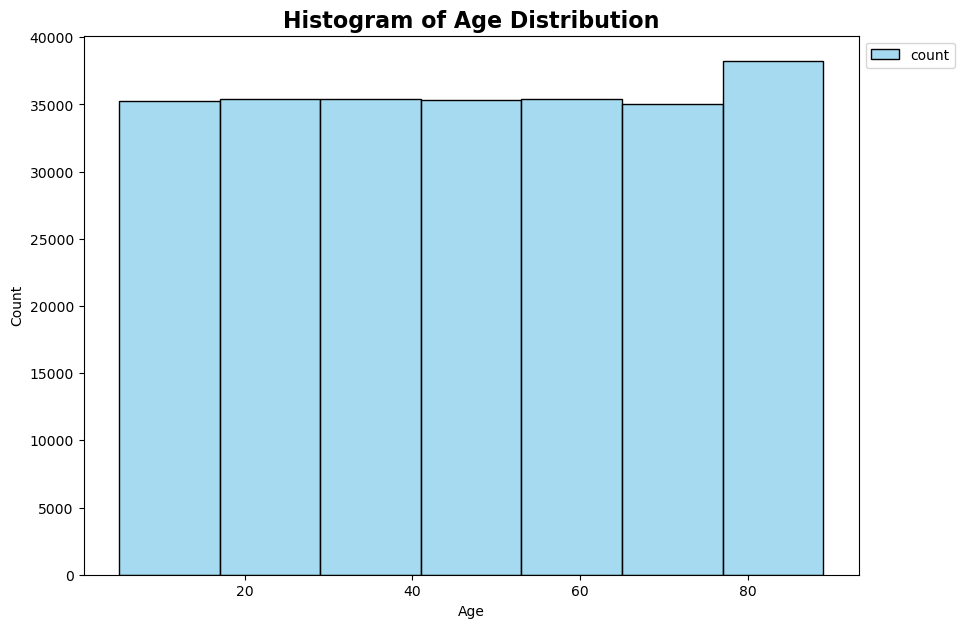

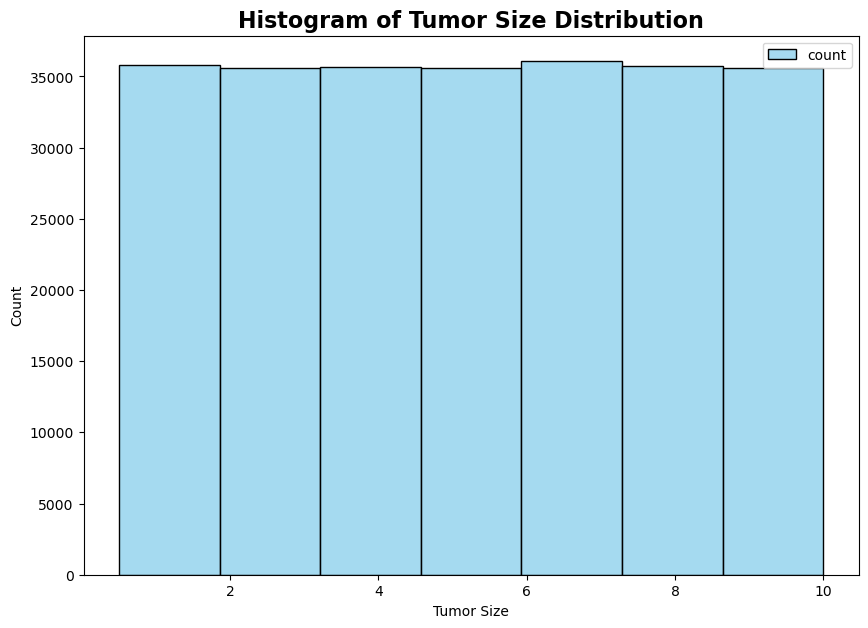

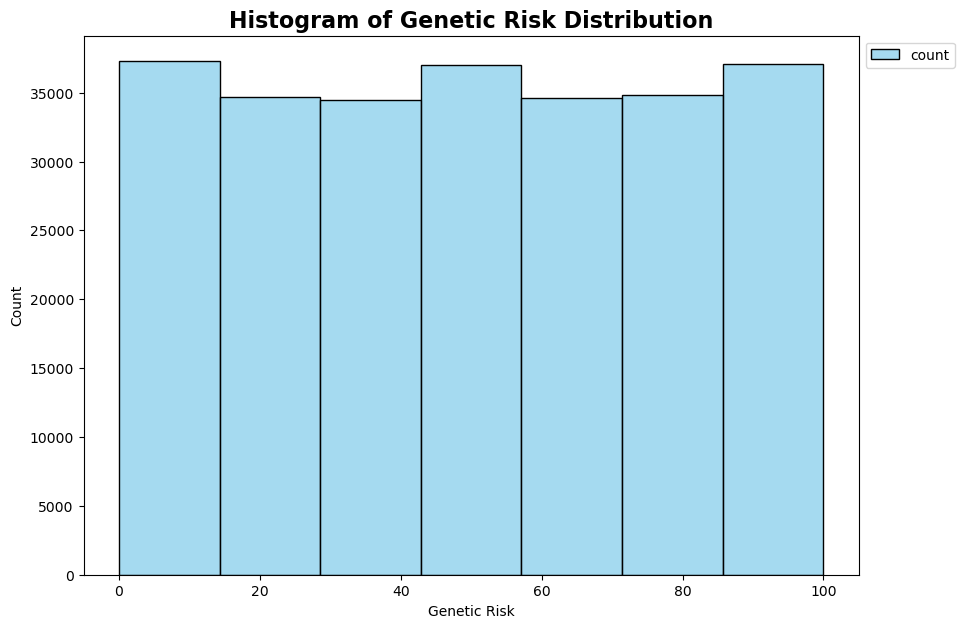

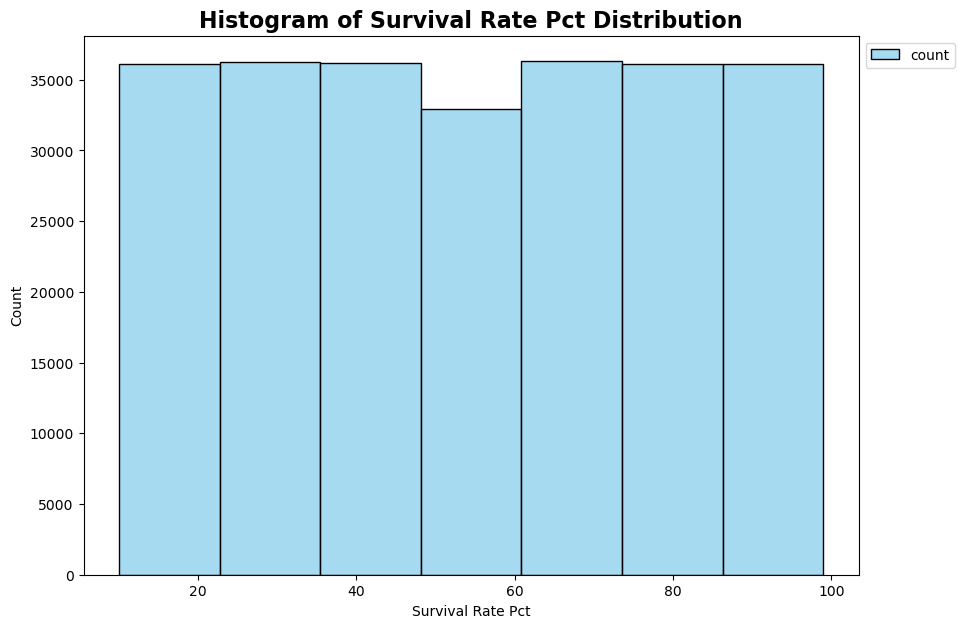

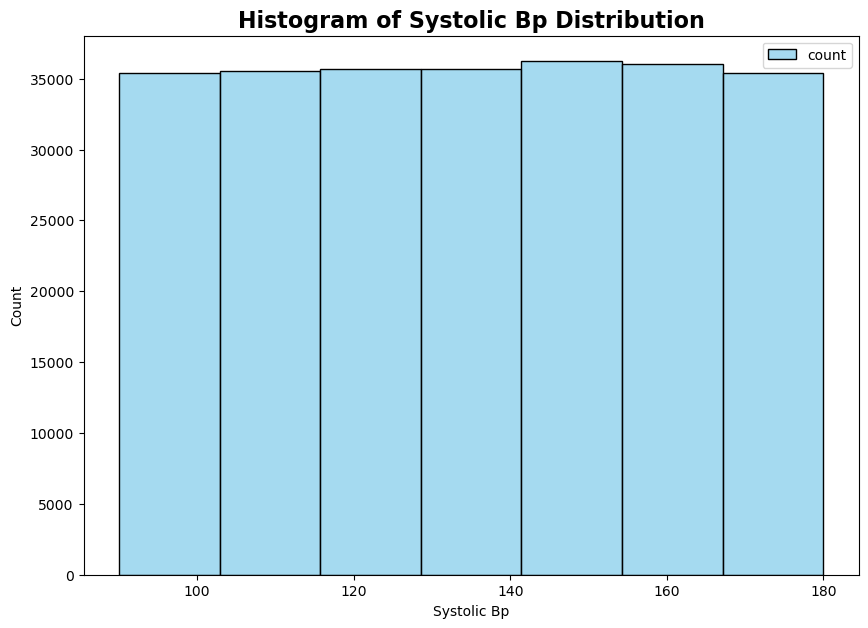

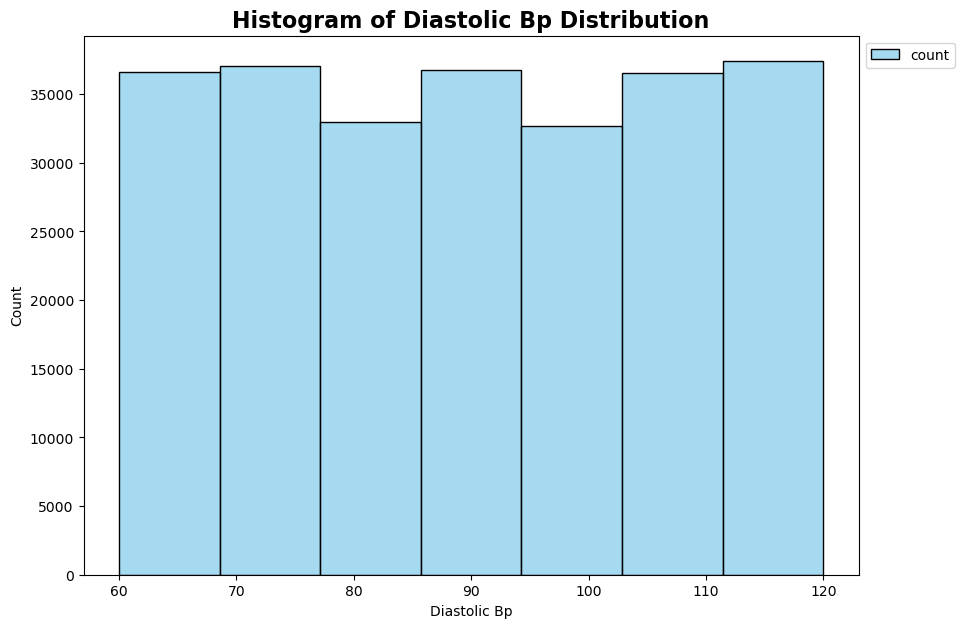

In [78]:
for col in num_col:
    plt.figure(figsize = (10, 7))
    sns.histplot(x = col, data = df, color = 'skyblue', bins = 7, edgecolor = 'black', label = 'count')
    plt.title(f"Histogram of {col.title().replace('_', ' ')} Distribution", fontweight = 'bold', fontsize = 16)
    plt.xlabel(col.title().replace('_', ' '))
    plt.ylabel("Count")
    plt.legend(bbox_to_anchor = (1, 1))
    plt.show()
    print()
    

# Grouping by Gender to draw insights

In [79]:
gender = df.groupby('gender').agg({'gender' : 'size', **{col : 'mean' for col in num_col}})
gender = gender.rename(columns = {'gender' : 'gender_count'})
gender.reset_index(inplace = True)
gender.T

,0,1,2
gender,Female,Male,Other
gender_count,83375,83407,83218
age,47.070417,46.828707,46.988248
tumor_size,5.264597,5.238059,5.252654
genetic_risk,50.043094,49.972304,49.981326
survival_rate_pct,54.343364,54.540542,54.560816
systolic_bp,135.154699,135.178678,134.9105
diastolic_bp,90.076282,90.038846,90.014228


Pie Chart of Gender Distribution

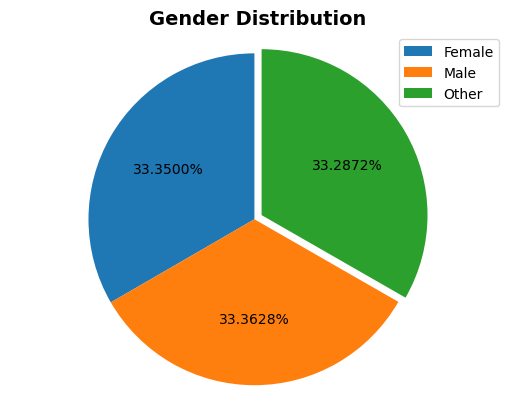

In [80]:
plt.pie(gender['gender_count'], autopct = '%1.4f%%', startangle = 90, explode = [0, 0, 0.05])
plt.title("Gender Distribution", fontsize = 14, fontweight = 'bold')
plt.legend(gender['gender'], bbox_to_anchor = (1, 1))
plt.axis('equal')
plt.show()

# Grouping by country to draw insights

In [81]:
country = df.groupby('country').agg({'country' : 'size', **{col : 'mean' for col in num_col}})
country = country.rename(columns = {'country' : 'country_count'})
country.reset_index(inplace = True)
country

,country,country_count,age,tumor_size,genetic_risk,survival_rate_pct,systolic_bp,diastolic_bp
0,Australia,20780,46.988354,5.251837,49.942445,54.445428,135.168624,90.009962
1,Brazil,20985,46.599095,5.275247,49.696736,54.504646,135.043555,89.933762
2,Canada,20854,46.537451,5.254952,50.115086,54.558214,135.063105,90.089431
3,China,20890,46.947295,5.242949,50.042843,54.025802,135.138727,89.969746
4,France,20733,46.920851,5.236869,50.051994,54.633290,135.228621,90.249650
5,Germany,20895,47.296770,5.255793,50.061785,54.349127,134.969514,89.958028
6,India,20883,46.948140,5.248368,49.453335,54.486041,135.320644,90.158646
7,Japan,20842,47.332406,5.241251,50.417138,54.696862,134.848575,90.066932
8,Russia,20975,47.135399,5.256238,50.147128,54.410965,135.044243,90.059166
9,South Africa,20608,46.943808,5.241037,50.139412,54.341858,135.012956,89.850446


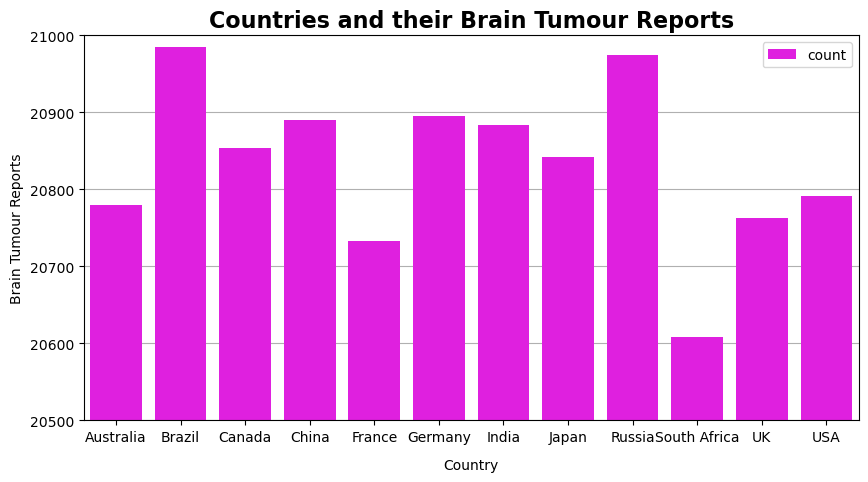

In [82]:
plt.figure(figsize = (10, 5))
bar = sns.barplot(y = 'country_count', x = 'country', data = country, label = 'count', color = 'magenta')
plt.title("Countries and their Brain Tumour Reports", fontsize = 16, fontweight = 'bold')
plt.xlabel("Country", labelpad = 10)
plt.ylabel("Brain Tumour Reports")
plt.grid(axis = 'y')
bar.set_axisbelow(True)
plt.ylim(20500, 21000)
plt.show()

Top 5 countries with most Brain Tumour reports

In [83]:
con_5 = country.nlargest(5, 'country_count')
con_5.index = np.arange(1, 6)
con_5

,country,country_count,age,tumor_size,genetic_risk,survival_rate_pct,systolic_bp,diastolic_bp
1,Brazil,20985,46.599095,5.275247,49.696736,54.504646,135.043555,89.933762
2,Russia,20975,47.135399,5.256238,50.147128,54.410965,135.044243,90.059166
3,Germany,20895,47.296770,5.255793,50.061785,54.349127,134.969514,89.958028
4,China,20890,46.947295,5.242949,50.042843,54.025802,135.138727,89.969746
5,India,20883,46.948140,5.248368,49.453335,54.486041,135.320644,90.158646


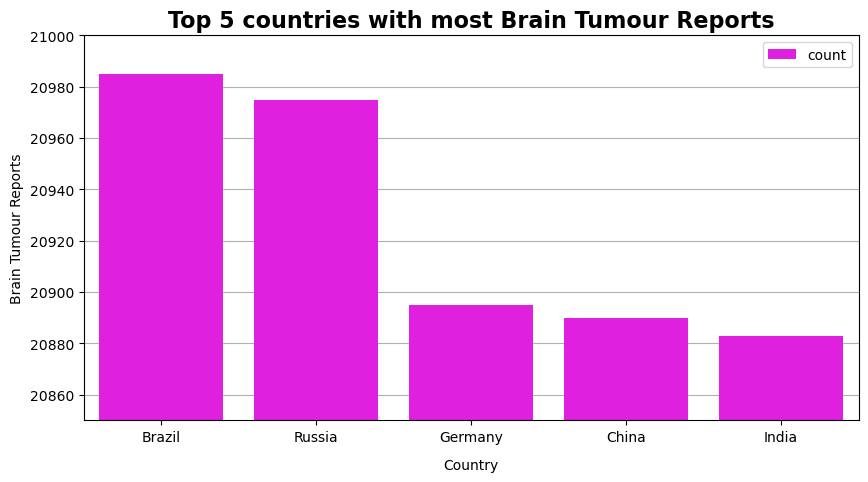

In [84]:
plt.figure(figsize = (10, 5))
bar = sns.barplot(y = 'country_count', x = 'country', data = con_5, label = 'count', color = 'magenta')
plt.title("Top 5 countries with most Brain Tumour Reports", fontsize = 16, fontweight = 'bold')
plt.xlabel("Country", labelpad = 10)
plt.ylabel("Brain Tumour Reports")
plt.grid(axis = 'y')
bar.set_axisbelow(True)
plt.ylim(20850, 21000)
plt.show()

Top 10 countries with highest chance of genetic risk

In [85]:
con_gen_5 = country.nlargest(5, 'genetic_risk')
con_gen_5.index = np.arange(1, 6)
con_gen_5

,country,country_count,age,tumor_size,genetic_risk,survival_rate_pct,systolic_bp,diastolic_bp
1,Japan,20842,47.332406,5.241251,50.417138,54.696862,134.848575,90.066932
2,Russia,20975,47.135399,5.256238,50.147128,54.410965,135.044243,90.059166
3,South Africa,20608,46.943808,5.241037,50.139412,54.341858,135.012956,89.850446
4,Canada,20854,46.537451,5.254952,50.115086,54.558214,135.063105,90.089431
5,USA,20792,46.865766,5.270745,50.112688,54.753992,135.225760,90.192045


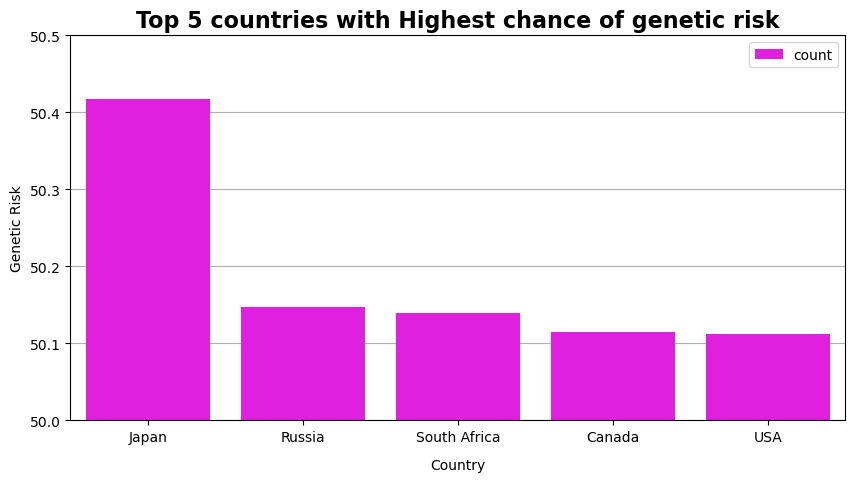

In [86]:
plt.figure(figsize = (10, 5))
bar = sns.barplot(y = 'genetic_risk', x = 'country', data = con_gen_5, label = 'count', color = 'magenta')
plt.title("Top 5 countries with Highest chance of genetic risk", fontsize = 16, fontweight = 'bold')
plt.xlabel("Country", labelpad = 10)
plt.ylabel("Genetic Risk")
plt.grid(axis = 'y')
bar.set_axisbelow(True)
plt.ylim(50, 50.5)
plt.show()

In [87]:
df.head().T

,0,1,2,3,4
age,66,87,41,52,84
gender,Other,Female,Male,Male,Female
country,China,Australia,Canada,Japan,Brazil
tumor_size,8.7,8.14,6.02,7.26,7.94
tumor_location,Cerebellum,Temporal,Occipital,Occipital,Temporal
mri_findings,Severe,Normal,Severe,Normal,Abnormal
genetic_risk,81,65,100,19,47
smoking_history,No,No,Yes,Yes,No
alcohol_consumption,Yes,Yes,No,Yes,Yes
radiation_exposure,Medium,Medium,Low,High,Medium


# Line Chart of Systolic Bp with the respective Diastolic BP of people

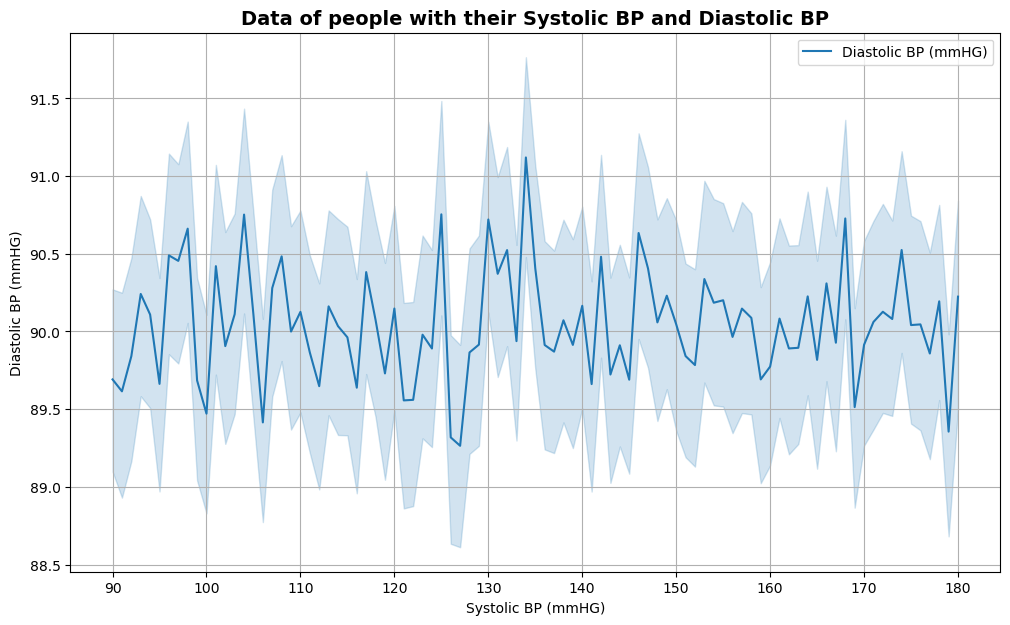

In [88]:
plt.figure(figsize = (12, 7))
sns.lineplot(x = 'systolic_bp', y = 'diastolic_bp', data = df, label = 'Diastolic BP (mmHG)')
plt.xlabel("Systolic BP (mmHG)")
plt.ylabel("Diastolic BP (mmHG)")
plt.title("Data of people with their Systolic BP and Diastolic BP", fontweight = 'bold', fontsize = 14)
plt.legend(bbox_to_anchor = (1, 1))
plt.grid()
plt.xticks(np.linspace(np.min(df['systolic_bp']), np.max(df['systolic_bp']), 10))
plt.show()

# Grouping by tumour location to draw insights

In [89]:
tum_loc = df.groupby('tumor_location').agg({'tumor_location' : 'size', **{col : 'mean' for col in num_col}})
tum_loc = tum_loc.rename(columns = {'tumor_location' : 'tumor_location_count'})
tum_loc.reset_index(inplace = True)
tum_loc

,tumor_location,tumor_location_count,age,tumor_size,genetic_risk,survival_rate_pct,systolic_bp,diastolic_bp
0,Cerebellum,49856,46.761774,5.226901,50.045270,54.535302,135.125923,90.119203
1,Frontal,49884,46.985486,5.266743,50.075816,54.261386,135.166085,90.060380
2,Occipital,50081,47.091612,5.263494,50.066492,54.538687,134.946626,89.990795
3,Parietal,50187,46.907964,5.249423,50.134597,54.593739,135.075239,89.988802
4,Temporal,49992,47.064770,5.252232,49.672048,54.477676,135.093755,90.057049


# Grouping by tumour type to draw insights

In [90]:
tum_type = df.groupby('tumor_type').agg({'tumor_type' : 'size', **{col : 'mean' for col in num_col}})
tum_type = tum_type.rename(columns = {'tumor_type' : 'tumor_type_count'})
tum_type.reset_index(inplace = True)
tum_type

,tumor_type,tumor_type_count,age,tumor_size,genetic_risk,survival_rate_pct,systolic_bp,diastolic_bp
0,Benign,125204,46.963987,5.243353,49.989817,54.430769,135.040358,90.042523
1,Malignant,124796,46.960856,5.260210,50.008045,54.532461,135.122600,90.043751


Pie chart to show their distribution

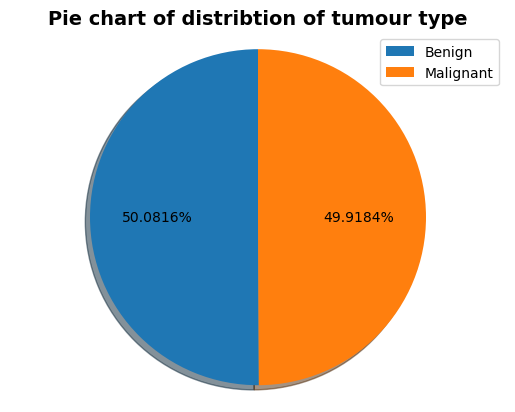

In [91]:
plt.pie(tum_type['tumor_type_count'], autopct = '%1.4f%%', startangle = 90, shadow = True)
plt.title("Pie chart of distribtion of tumour type", fontsize = 14, fontweight = 'bold')
plt.legend(tum_type['tumor_type'], bbox_to_anchor = (1, 1))
plt.axis('equal')
plt.show()

# Heat Map of correlation

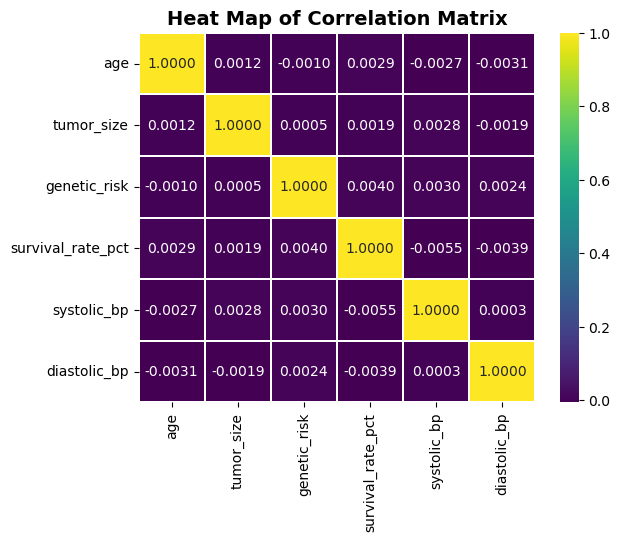

In [93]:
corr = df[num_col].corr()
sns.heatmap(corr, cmap = 'viridis', annot = True, fmt = '.4f', linewidth = 1.2, edgecolor = 'black')
plt.title("Heat Map of Correlation Matrix", fontsize = 14, fontweight = 'bold')
plt.show()